### Student Information
Name: Atsbaha Teweldemedhn Hagos 

Student ID: 611421412

GitHub ID: https://github.com/Ats-Tewe/DM2025-Lab1-Exercise/tree/main

# Note: The homework part is here in this document whereas the master assignment is in the master file. 

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

# Data Mining Lab 1
In this lab session we will focus on the use of scientific computing libraries to efficiently process, transform, and manage data. We will also provide best practices and introduce visualization tools for effectively conducting big data analysis. Furthermore, we will show you how to implement basic classification techniques.

In [1]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets

from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Ecample to show the first five rows - simply for demo purpose 
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

# show first 5 rows
print(df.head())

      type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is begging Xi Jinping...          Just-Big6411   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1     

---

## Table of Contents
**Phase 2**
   - 5.4.2 Frequent Pattern Mining
 - 5.5 Dimensionality Reduction
 - 5.6 Discretization and Binarization
6. Data Exploration
7. Data Classification
8. Conclusion
9. References

---

In [3]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [4]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

C:\Users\Admin\Documents\DM2025labs\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


---

## 2. Data Preparation

In [5]:
# mapping definition for readability
label_mapping = {
    -1.0: "Negative",
     0.0: "Neutral",
     1.0: "Positive"
}

# create a new column with category names
df["label_name"] = df["label"].map(label_mapping)

print(df[["text", "label", "label_name"]].head())


                                                text  label label_name
0                                   Calls on retards   -1.0   Negative
1  Stunt as in like why did they even make a big ...    0.0    Neutral
2                  Seeing lots of red in the ticker.    0.0    Neutral
3  Vision Marine Technologies Inc. is rewriting t...    1.0   Positive
4                           He didn’t say thank you.   -1.0   Negative


---

### **>>> Exercise 1 (Watch Video):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [6]:
# Answer here

# Show first 3 samples of the text column
print("First 3 text samples:\n")
for i in range(3):
    print(f"Sample {i+1}:")
    print(df.loc[i, "text"])
    print("-" * 50)

# Also print the labels for those samples
print("\nLabels of first 3 samples:")
print(df.loc[0:2, ["text", "label"]])


First 3 text samples:

Sample 1:
Calls on retards
--------------------------------------------------
Sample 2:
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
--------------------------------------------------
Sample 3:
Seeing lots of red in the ticker.
--------------------------------------------------

Labels of first 3 samples:
                                                text  label
0                                   Calls on retards   -1.0
1  Stunt as in like why did they even make a big ...    0.0
2                  Seeing lots of red in the ticker.    0.0


---

## 3. Data Transformation


---

### 3.1 Converting Dictionary into Pandas Dataframe


In [7]:

import helpers.modified_helpers as dmh   # your modified helpers

# Use helpers to format rows (text) and labels
texts = dmh.format_rows(df)      # cleaned text column
labels = dmh.format_labels(df)   # numeric sentiment label
# creates a DataFrame pairing text with label
X = pd.DataFrame.from_records(zip(texts, labels), columns=['text', 'label'])
X

,text,label
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big ...,0.0
2,Seeing lots of red in the ticker.,0.0
3,Vision Marine Technologies Inc. is rewriting t...,1.0
4,He didn’t say thank you.,-1.0
...,...,...
842,Invest now it is going to shoot up tomorrow,1.0
843,Where can I read this?,0.0
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco...",0.0
845,i sold my puts so i expect cheeto to declare w...,-1.0


In [8]:
# Show number of rows
print(len(X))

847


In [9]:
# Show first 2 rows
print(X[0:2])

                                                text  label
0                                   Calls on retards   -1.0
1  Stunt as in like why did they even make a big ...    0.0


In [10]:
# Print the text of the first 2 rows
for t in X["text"][:2]:
    print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.


### Adding Columns

In [11]:
# Add a human-readable label name
label_mapping = {-1: "negative", 0: "neutral", 1: "positive"} #converts numbers into sentiment names

In [12]:
X["label_name"] = X["label"].map(label_mapping) # applies mapping to each row.

X

,text,label,label_name
0,Calls on retards,-1.0,negative
1,Stunt as in like why did they even make a big ...,0.0,neutral
2,Seeing lots of red in the ticker.,0.0,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive
4,He didn’t say thank you.,-1.0,negative
...,...,...,...
842,Invest now it is going to shoot up tomorrow,1.0,positive
843,Where can I read this?,0.0,neutral
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco...",0.0,neutral
845,i sold my puts so i expect cheeto to declare w...,-1.0,negative


Now we can print and see what our table looks like. 

In [13]:
# Show first 10 rows
print(X[0:10])

                                                text  label label_name
0                                   Calls on retards   -1.0   negative
1  Stunt as in like why did they even make a big ...    0.0    neutral
2                  Seeing lots of red in the ticker.    0.0    neutral
3  Vision Marine Technologies Inc. is rewriting t...    1.0   positive
4                           He didn’t say thank you.   -1.0   negative
5  Hoping to ejaculate in wet warm puss tonight, ...    0.0    neutral
6  Trump will respond to china increasing their t...   -1.0   negative
7  Confirmed not a trap. Its been like this for p...    0.0    neutral
8  Am I the only one seeing the cup & handle brea...    1.0   positive
9  HLGN is $10. Hurry and catch it now before it ...    1.0   positive


---

### 3.2 Familiarizing yourself with the Data

In [14]:
# Show only text + label_name columns
print(X[:10][["text", "label_name"]])

                                                text label_name
0                                   Calls on retards   negative
1  Stunt as in like why did they even make a big ...    neutral
2                  Seeing lots of red in the ticker.    neutral
3  Vision Marine Technologies Inc. is rewriting t...   positive
4                           He didn’t say thank you.   negative
5  Hoping to ejaculate in wet warm puss tonight, ...    neutral
6  Trump will respond to china increasing their t...   negative
7  Confirmed not a trap. Its been like this for p...    neutral
8  Am I the only one seeing the cup & handle brea...   positive
9  HLGN is $10. Hurry and catch it now before it ...   positive


#### Let's query the last 10 records

In [15]:
# Last 10 rows
print(X[-10:])


                                                  text  label label_name
837               Finance media lying \r \r *Surprise*   -1.0   negative
838                                        I am all in    0.0    neutral
839                               The Art of the Deal…    0.0    neutral
840                                             Lol fr    0.0    neutral
841  So countries “begging to stop the tariffs” and...    1.0   positive
842        Invest now it is going to shoot up tomorrow    1.0   positive
843                             Where can I read this?    0.0    neutral
844  Upgrades, Downgrades\r \r  [Stock Analyst Reco...    0.0    neutral
845  i sold my puts so i expect cheeto to declare w...   -1.0   negative
846                       ![img](emote|t5_2th52|31224)    0.0    neutral


Ready for some sourcery? Brace yourselves! Let us see if we can query the first 10th record in our dataframe. For this we will use the build-in function called `loc`. This allows us to explicity define the columns you want to query.

In [16]:
# Using loc: select rows 0–10, only text column
print(X.loc[:10, 'text'])

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object


You can also use the `iloc` function to query a selection of our dataset by position. Take a look at this [great discussion](https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-ix-vs-at-vs-iat/43968774) on the differences between the `iloc` and `loc` functions.

In [17]:
# Using iloc: select first 10 rows, first column (text)
print(X.iloc[:10, 0])

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object


### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [18]:
#Answer here
# Experiment using other querying techniques 

print(X[X["label"] == 1].head(3)) #Show the first 3 positive records

print(X[X["label"] == 0].tail(3)) # Show the last 3 neutral records

print(X[X["label"] == -1].sample(5, random_state=42)) # Select random 5 negative samples

print(X[X["text"].str.len() > 100].head(5)) # Select records where text length > 100 characters


                                                text  label label_name
3  Vision Marine Technologies Inc. is rewriting t...    1.0   positive
8  Am I the only one seeing the cup & handle brea...    1.0   positive
9  HLGN is $10. Hurry and catch it now before it ...    1.0   positive
                                                  text  label label_name
843                             Where can I read this?    0.0    neutral
844  Upgrades, Downgrades\r \r  [Stock Analyst Reco...    0.0    neutral
846                       ![img](emote|t5_2th52|31224)    0.0    neutral
                                                  text  label label_name
539  China has been preparing for this and this adm...   -1.0   negative
100  Do we have a copy of trump’s kindergarten grad...   -1.0   negative
428  It was so blatant.  In a normal version of the...   -1.0   negative
229  "hmm. Trade War with China sounds good."\r \r ...   -1.0   negative
270               I’m tired. The US is a goddamn joke.   -1

---

### **>>> Exercise 3 (Watch Video):**  

In [19]:
# Answer here
# to display the postive sentiment record and query 10th recond - showing only the first 5

# Filter positive sentiment records
positive_records = X[X["label"] == 1]

# Select every 10th record
positive_every_10th = positive_records.iloc[::10]

# Show the first 5 of them
print(positive_every_10th.head(5)[["text", "label_name"]])


                                                  text label_name
3    Vision Marine Technologies Inc. is rewriting t...   positive
78   I think it’s gonna work itself out. I bought t...   positive
168  The obvious can also be refreshing from CNBC: ...   positive
219  Same. Back to break even after that last rip b...   positive
319  Etrade has a feed of news articles about how r...   positive


---

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [20]:
# check missing values
X.isnull()

,text,label,label_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
842,False,False,False
843,False,False,False
844,False,False,False
845,False,False,False


In [21]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text          Total missing values: 0. Summary: 0
label         Total missing values: 0. Summary: 0
label_name    Total missing values: 0. Summary: 0
dtype: object

---

### >>> **Exercise 4 (Watch Video):** 

In [22]:
# Answer here
# Check missing values by column using helper 
print("Missing values per column:")
print(dmh.check_missing_values(X))

# Check missing values by row
print("\nMissing values per record (row):")
print(X.isnull().sum(axis=1).head(10))  # show first 10 rows


Missing values per column:
Total missing values: 0. Summary: text          0
label         0
label_name    0
dtype: int64

Missing values per record (row):
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64


---

In [23]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "label"])

In [24]:
print(dummy_series)

text     dummy_record
label               1
dtype: object


In [25]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

,text,label
0,dummy_record,1


In [26]:
#  Concatenate into our DataFrame
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [27]:
# Check size
print("New length with dummy record:", len(result_with_series))

New length with dummy record: 848


Now we that we have added the record with some missing values. Let try our function and see if it can detect that there is a missing value on the resulting dataframe.

In [28]:
# # Use helper function to check missing values
# check_missing = result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))
# print(check_missing.to_frame())

missing_check = result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x)).to_frame().T
missing_check

,text,label,label_name
0,Total missing values: 0. Summary: 0,Total missing values: 0. Summary: 0,Total missing values: 0. Summary: 0


In [29]:
# Dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record', 'label': 1}]


In [30]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [31]:
print("New length after dictionary dummy row:", len(X))

New length after dictionary dummy row: 848


In [32]:
# Check for missing values
print(X.isnull().apply(lambda x: dmh.check_missing_values(x)))

text          Total missing values: 0. Summary: 0
label         Total missing values: 0. Summary: 0
label_name    Total missing values: 0. Summary: 0
dtype: object


So now that we can see that our data has missing values, we want to remove the records with missing values. The code to drop the record with missing that we just added, is the following:

In [33]:
# Drop rows with missing values
X.dropna(inplace=True)

... and now let us test to see if we gotten rid of the records with missing values. 

In [34]:
# Verify missing values again
print(X.isnull().apply(lambda x: dmh.check_missing_values(x)))

text          Total missing values: 0. Summary: 0
label         Total missing values: 0. Summary: 0
label_name    Total missing values: 0. Summary: 0
dtype: object


In [35]:
print("Final length after dropping NA:", len(X))

Final length after dropping NA: 847


And we are back with our original dataset, clean and tidy as we want it. That's enough on how to deal with missing values, let us now move unto something more fun. 

But just in case you want to learn more about how to deal with missing data, refer to the official [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data).

---

### >>> **Exercise 5 (take home)** 

In [36]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [37]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

# Answer here
.isnull() method only detects the missing values with np.npm, None, or the missing column values. 
therefore, np.nan, None, and Missing column that is the second row or B. However, the remaining are strings('NaN', "None', and ' ')

---

### 4.2 Dealing with Duplicate Data

In [38]:
X.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

We can also check the sum of duplicate records by simply doing:

In [39]:
sum(X.duplicated())

23

In [40]:
sum(X.duplicated('text'))

23

Now let us create some duplicated dummy records and append it to the main dataframe `X`. Subsequenlty, let us try to get rid of the duplicates.

In [41]:
# This line dropes the 23 duplicated texts
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [42]:
len(X)

813

## 5.  Data Preprocessing
- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

---

### 5.1 Sampling

In [43]:
X_sample = X.sample(n=300) #random state

In [44]:
len(X_sample)

300

In [45]:
X_sample[0:4]

,text,label,label_name
701,"""Good afternoon!""",0.0,neutral
169,Just stumbled upon some exciting news about St...,1.0,positive
111,What dose the 100.027 mean ?,0.0,neutral
148,Hello! How well do you know international trad...,-1.0,negative


---

### >>> Exercise 6 (take home):

# Answer here
# when i compare the sample and the original whole dataset, i observed:- 

- X_sample is only 300 rows which is smaller than X.

- Since .sample() shuffles randomly, the rows are not in the same order as the original one.

- Hence, The distribution of labels in X_sample will not perfectly match X.

---

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 7 (Watch Video):**

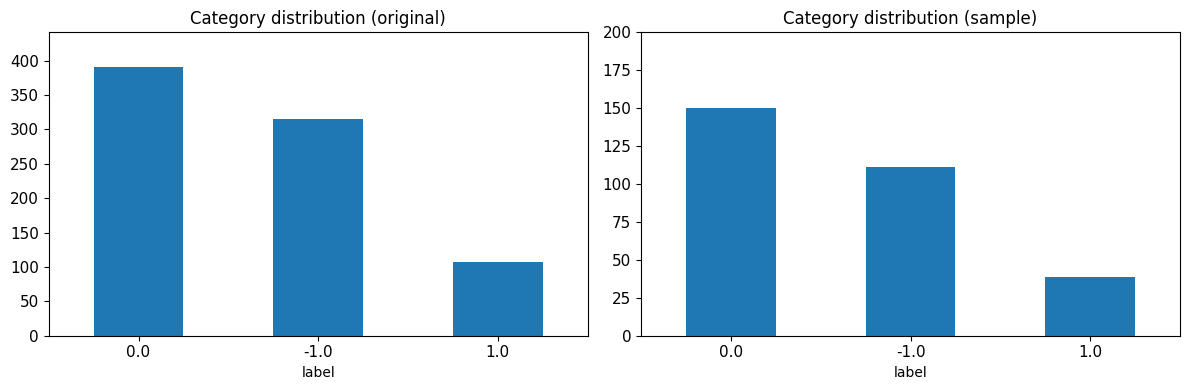

In [47]:
# Answer here
# Automating the value of Y
ymax_X = X['label'].value_counts().max()
ymax_sample = X_sample['label'].value_counts().max()

# Create figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot original dataset distribution on the first subplot
X['label'].value_counts().plot(
    kind='bar',
    title='Category distribution (original)',
    ylim=[0, ymax_X + 50],   # auto-scaled
    rot=0, fontsize=11, ax=axes[0])

# Plot sampled dataset distribution on the second subplot
X_sample['label'].value_counts().plot(
    kind='bar',
    title='Category distribution (sample)',
    ylim=[0, ymax_sample + 50],  # auto-scaled
    rot=0, fontsize=11, ax=axes[1])

# Adjust layout so titles/labels don’t overlap
plt.tight_layout()
plt.show()


---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

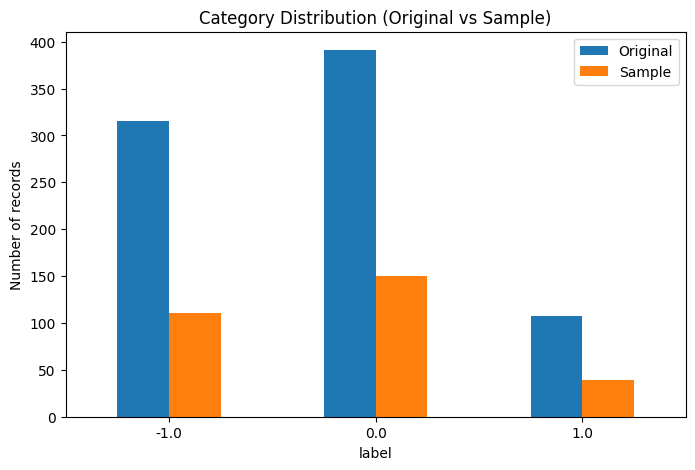

In [48]:
# Answer here

# Count categories for both datasets
orig_counts = X['label'].value_counts().sort_index()
sample_counts = X_sample['label'].value_counts().sort_index()
9
# Combine into one DataFrame
compare_df = pd.DataFrame({
    'Original': orig_counts,
    'Sample': sample_counts})

# Plot side-by-side
compare_df.plot(kind='bar',
                figsize=(8,5),
                rot=0,
                title="Category Distribution (Original vs Sample)")
plt.ylabel("Number of records")
plt.show()


One thing that stood out from the both datasets, is that the distribution of the categories remain relatively the same, which is a good sign for us data scientist. There are many ways to conduct sampling on the dataset and still obtain a representative enough dataset. That is not the main focus in this notebook, but if you would like to know more about sampling and how the `sample` feature works, just reference the Pandas documentation and you will find interesting ways to conduct more advanced sampling.

---

### 5.2 Feature Creation


In [49]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [50]:
# Apply helper function to tokenize
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [51]:
# Show first few with unigrams
print(X[0:4][["text", "unigrams"]])

                                                text  \
0                                   Calls on retards   
1  Stunt as in like why did they even make a big ...   
2                  Seeing lots of red in the ticker.   
3  Vision Marine Technologies Inc. is rewriting t...   

                                            unigrams  
0                               [Calls, on, retards]  
1  [Stunt, as, in, like, why, did, they, even, ma...  
2        [Seeing, lots, of, red, in, the, ticker, .]  
3  [Vision, Marine, Technologies, Inc., is, rewri...  


If you take a closer look at the `X` table now, you will see the new columns `unigrams` that we have added. You will notice that it contains an array of tokens, which were extracted from the original `text` field. At first glance, you will notice that the tokenizer is not doing a great job, let us take a closer at a single record and see what was the exact result of the tokenization using the `nltk` library.

In [52]:
X[0:4]

,text,label,label_name,unigrams
0,Calls on retards,-1.0,negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,0.0,neutral,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0.0,neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [53]:
list(X[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

---

### 5.3 Feature subset selection

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X['text'])

print(X_counts[0])  # sparse representation of first doc

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


Now you can also see some examples of what each feature is based on their index in the vector:

In [55]:
print(count_vect.get_feature_names_out()[300])  # example word

already


---

### **>>> Exercise 9 (Watch Video):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [56]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
# the below line of code analyzes the first Reddit Record using the built-in analyzer 

analyze = count_vect.build_analyzer()
print(analyze(X['text'][0]))


['calls', 'on', 'retards']


---

Now let us look at the term-document matrix we built above.

In [57]:
# We can check the shape of this matrix by:
X_counts.shape

(813, 4313)

In [58]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [59]:
X_counts.shape

(813, 4313)

In [60]:
# we convert from sparse array to normal array
X_counts[0:5, 0:200].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 

In [61]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

---

### **>>> Exercise 10 (take home):**

In [62]:
# Answer here
# from the given output abve, let me select one non nonzero value and display what term or word it is
# i chose fourth row index column 18 -  the way is similar, if we select 1 too. 
word=count_vect.get_feature_names_out()[18]
word

'116'

---

In [63]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [64]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [65]:

# Extract subset of doc-term matrix
plot_z = X_counts[0:20, 0:20].toarray()
plot_z


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

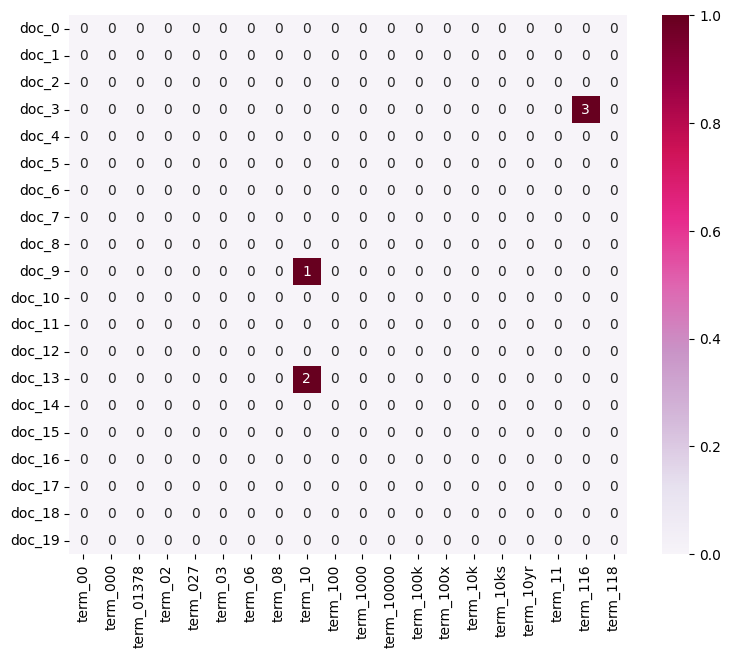

In [66]:
import seaborn as sns

# Build dataframe for seaborn
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

# Draw heatmap
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)
plt.show()


### **>>> Exercise 11 (take home):** 

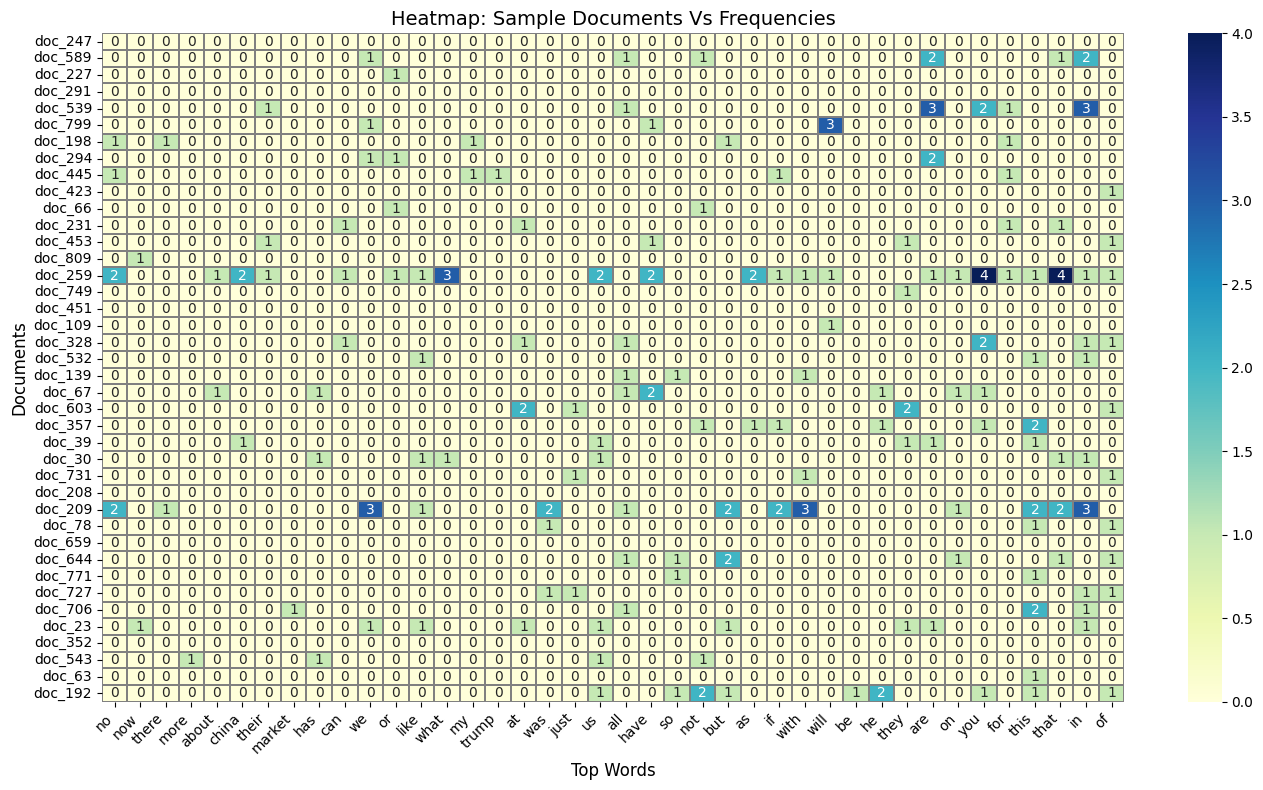

In [67]:
# Answer here


vocab = np.array(count_vect.get_feature_names_out())

# selecting terms or words 
term_freq = np.asarray(X_counts.sum(axis=0)).ravel()

# words that theier frequency is between 200 and 300
words = (term_freq >= 10) & (term_freq <= 300)
filtered_idx = np.where(words)[0]

# pick top 40 words among those
top_terms_idx = filtered_idx[np.argsort(term_freq[words])[-40:]]
top_terms = vocab[top_terms_idx]

# sampling - using row positions, not X.index
rng = np.random.RandomState(42)
sample_idx = rng.choice(X_counts.shape[0], size=40, replace=False)

# submatrix (docs vs terms)
sub = X_counts[sample_idx][:, top_terms_idx].toarray()

# create DataFrame for visualization
df = pd.DataFrame(
    sub,
    index=[f"doc_{i}" for i in sample_idx],  # keeps doc IDs aligned with sample_idx
    columns=top_terms)

# Visualization using heatmap 
plt.figure(figsize=(14,8))
sns.heatmap(df, cmap="YlGnBu", annot=True, fmt="d", cbar=True,
            linewidths=0.3, linecolor="gray")
plt.title("Heatmap: Sample Documents Vs Frequencies", fontsize=14)
plt.ylabel("Documents", fontsize=12)
plt.xlabel("Top Words", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# print("Min index in top_idx:", top_idx.min())

---

### 5.4 Attribute Transformation / Aggregation

###  5.4.1 Transform Text Data

In [68]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [69]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [70]:
term_frequencies[0] #sum of first term: 00

np.int64(4)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8564\3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


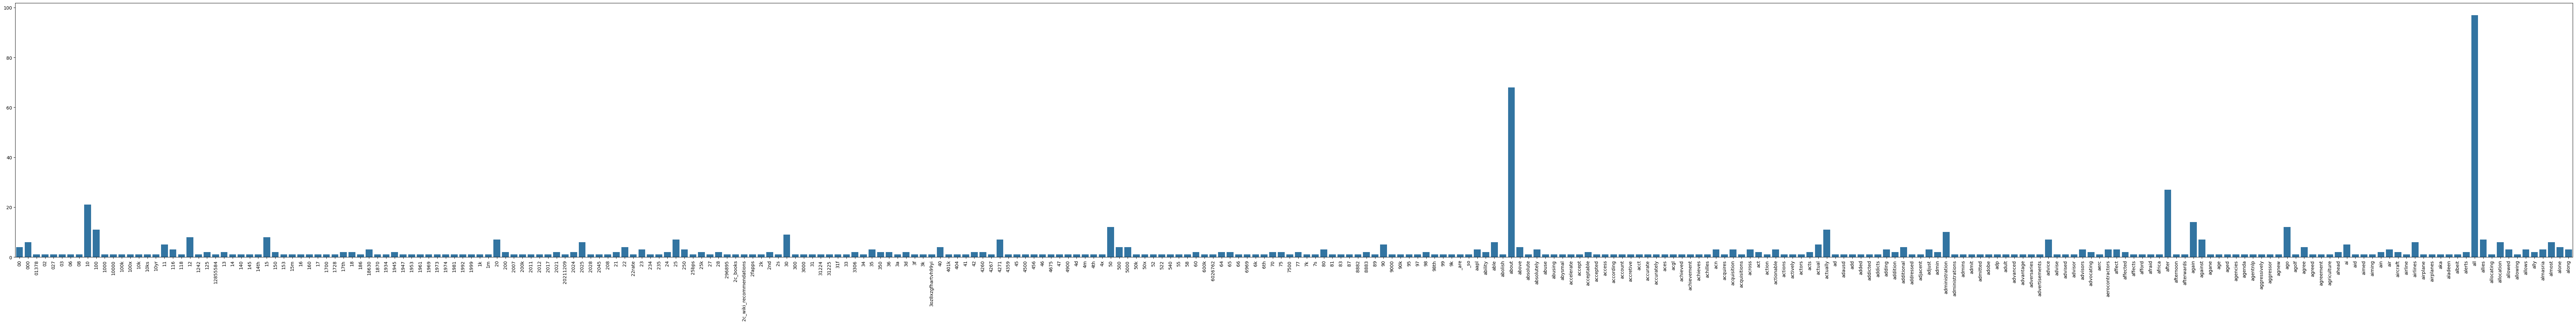

In [71]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

---

### >>> **Exercise 12 (take home):**

In [72]:
# Answer here

import plotly.express as px

# compute term frequencies
term_freq = np.asarray(X_counts.sum(axis=0)).ravel()
topK = 50
top_idx = np.argsort(term_freq)[-topK:][::-1]
top_terms = vocab[top_idx]
top_counts = term_freq[top_idx]

fig = px.bar(x=top_terms, y=top_counts, labels={'x':'term', 'y':'frequency'},
             title=f"Top {topK} terms (interactive)")
fig.update_layout(xaxis_tickangle=45)
fig.show()


---

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [73]:
# Answer here
# let me reduce to 50 random terms 
import plotly.express as px

feature_names = count_vect.get_feature_names_out()

# Create a DataFrame for ALL terms
df_all_terms = pd.DataFrame({
    'Terms': feature_names,
    'Frequency': term_frequencies})

# Select 50 random terms from the full DataFrame
df_random_N = df_all_terms.sample(50, random_state=42)

# Create the Plotly Bar Plot
fig = px.bar(
    df_random_N,
    x='Terms',
    y='Frequency',
    title=f'Random Sample of 50 Terms')

# Adjust the layout for the smaller, focused dataset
fig.update_layout(
    height=600,
    width=1000, 
    xaxis={'automargin': True},
    yaxis={'rangemode': 'tozero'})

fig.update_xaxes(
    tickangle=45,
    dtick=None,
    showticklabels=True)

fig.show()

---

### >>> **Exercise 14 (take home):** 

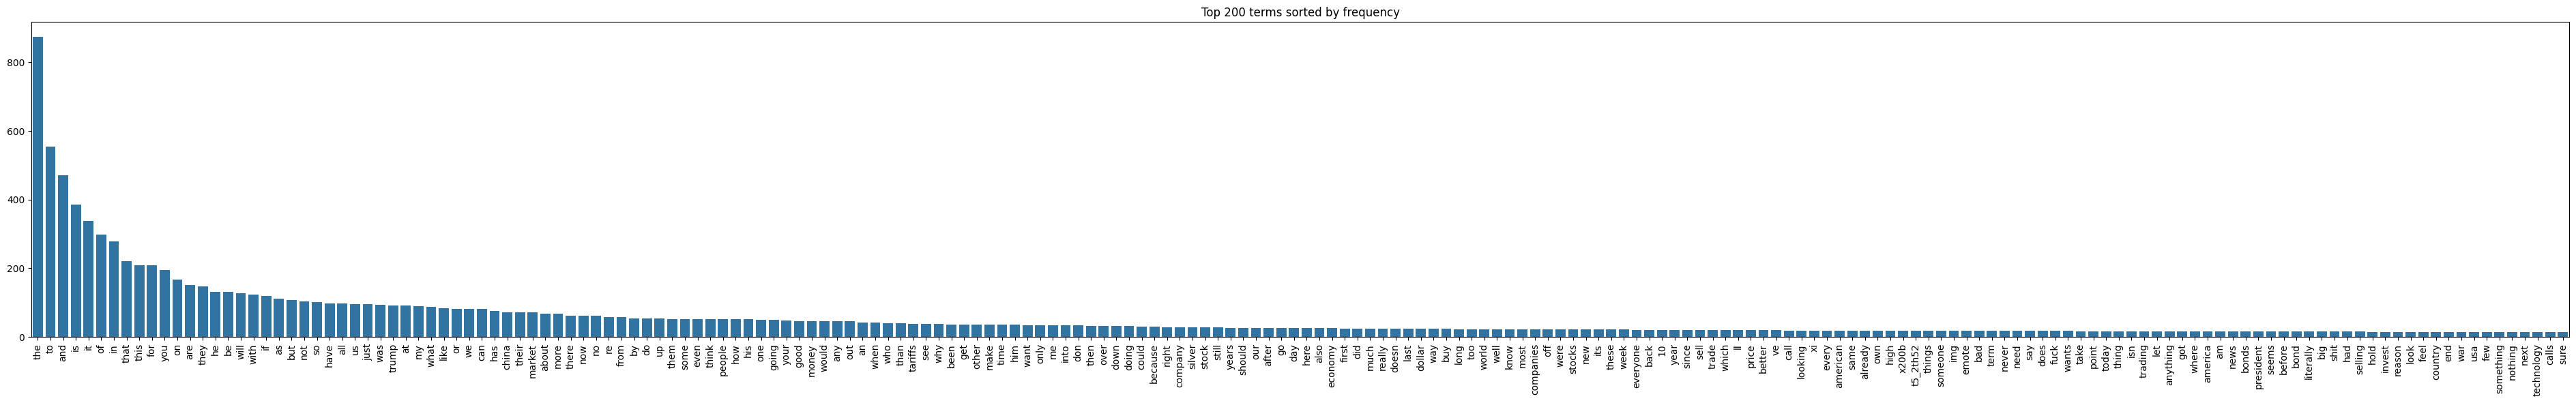

In [74]:
# Answer here

# sort
sorted_idx = np.argsort(term_freq)[::-1]    # most frequent first
K = 200
sel_idx = sorted_idx[:K]
sorted_terms = vocab[sel_idx]
sorted_counts = term_freq[sel_idx]

# plot bar 
plt.figure(figsize=(48,6))
sns.barplot(x=sorted_terms, y=sorted_counts)
plt.xticks(rotation=90)
plt.title(f"Top {K} terms sorted by frequency")
plt.show()


---

In [75]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\Admin\AppData\Local\Temp\ipykernel_8564\2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



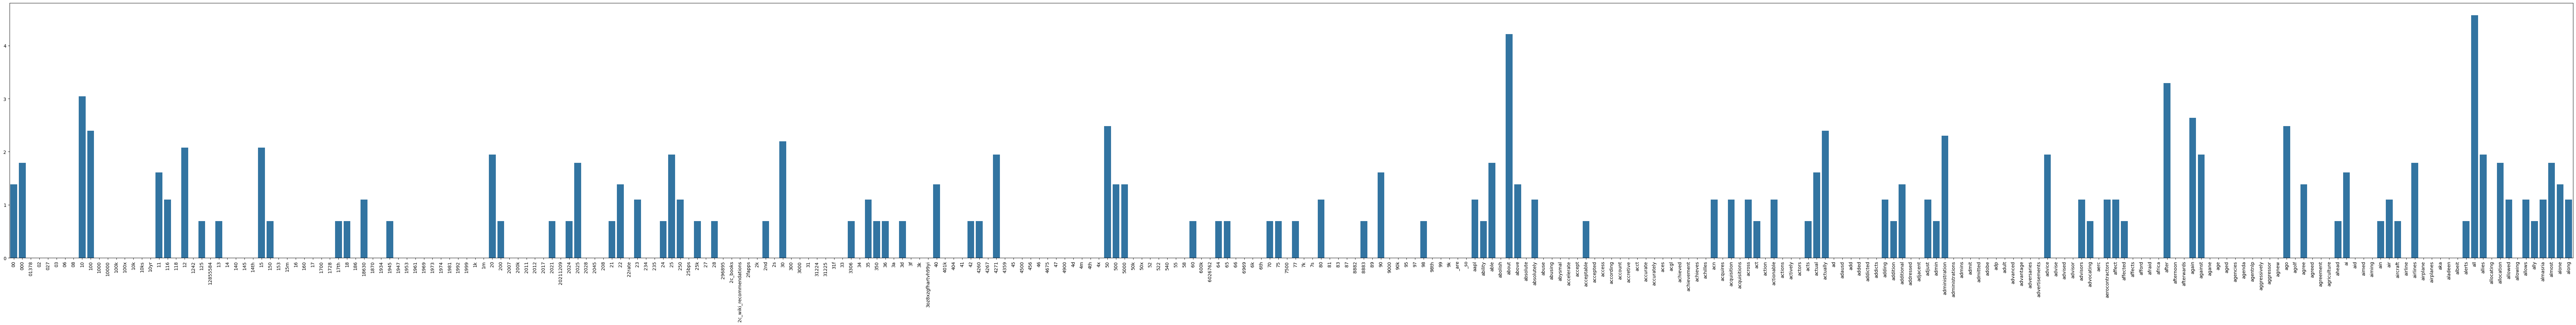

In [76]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 15 (take home):** 

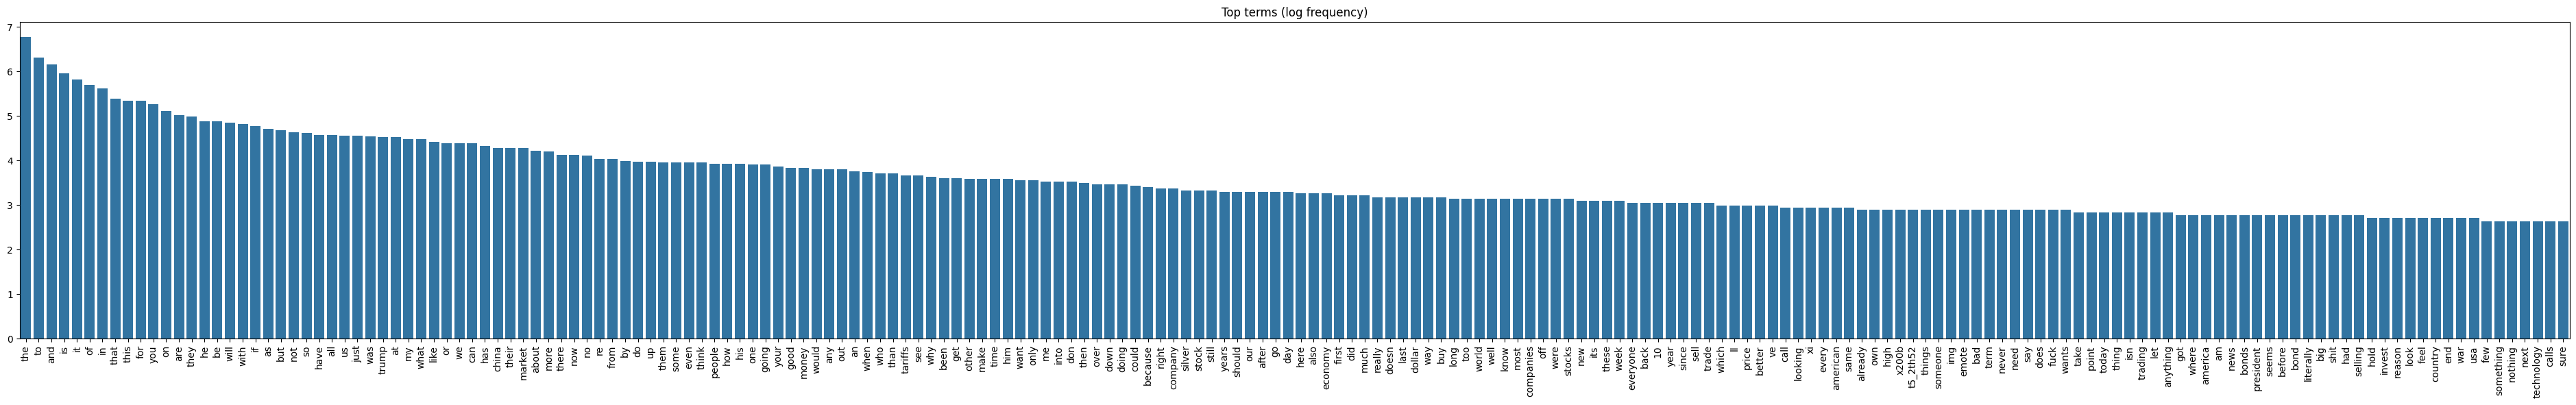

In [77]:
# Answer here

import math
term_freq = np.asarray(X_counts.sum(axis=0)).ravel()
term_freq_log = [math.log(x) if x>0 else 0 for x in term_freq]

# sort by frequency for plotting 
sorted_idx = np.argsort(term_freq)[::-1]
K = 200
sel_idx = sorted_idx[:K]

plt.figure(figsize=(48,6))
sns.barplot(x=vocab[sel_idx], y=np.array(term_freq_log)[sel_idx])
plt.xticks(rotation=90)
plt.title("Top terms (log frequency)")
plt.show()


End of Phase 1

The phase 1 exercises and homeworks should be committed and submitted before September 28th

---

### **Phase 2** 

### Finding frequent patterns

In [78]:
X.head()

,text,label,label_name,unigrams
0,Calls on retards,-1.0,negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,0.0,neutral,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0.0,neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,He didn’t say thank you.,-1.0,negative,"[He, didn, ’, t, say, thank, you, .]"


In [79]:
# Filtering the top 5% and bottom 1%

X[['text', 'label_name']].dropna()

# Create separate DataFrames per sentiment
categories = X['label_name'].unique()
category_dfs = {cat: X[X['label_name'] == cat].copy() for cat in categories}

# Term–document frequency DataFrame
def create_term_document_df(df):
    vect = CountVectorizer(stop_words='english')
    X_counts = vect.fit_transform(df['text'])
    words = vect.get_feature_names_out()
    return pd.DataFrame(X_counts.toarray(), columns=words)

filt_term_document_dfs = {cat: create_term_document_df(category_dfs[cat]) for cat in categories}

# Filter top 5 % and bottom 1 % words
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    word_sums = term_document_df.sum(axis=0)
    sorted_words = word_sums.sort_values()
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f"Bottom {bottom_percent*100}% words:\n", sorted_words.head(bottom_n))
    print(f"Top {top_percent*100}% words:\n", sorted_words.tail(top_n))
    return term_document_df.drop(columns=words_to_remove)

term_document_dfs = {}
for cat in categories:
    print(f"\nFiltering for category: {cat}")
    term_document_dfs[cat] = filter_top_bottom_words_by_sum(filt_term_document_dfs[cat])



Filtering for category: negative
Bottom 1.0% words:
 30         1
3000       1
31         1
350        1
40         1
401k       1
2011       1
2021       1
2025       1
17         1
1700       1
17th       1
1934       1
1947       1
1953       1
1961       1
sound      1
sources    1
_are       1
dtype: int64
Top 5.0% words:
 safe       6
prison     6
calls      6
bond       6
puts       6
          ..
people    28
like      28
just      43
china     46
trump     60
Length: 99, dtype: int64

Filtering for category: neutral
Bottom 1.0% words:
 yahoo          1
12855584       1
1242           1
118            1
10yr           1
10ks           1
10k            1
100x           1
100k           1
08             1
027            1
01378          1
predict        1
preclinical    1
precious       1
practice       1
works          1
2012           1
1m             1
1k             1
1870           1
18630          1
186            1
18             1
dtype: int64
Top 5.0% words:
 losing    

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

# Answer here
As it can seen from the above output, the differences and similarities are:

## Similarities:- 
Shared Common Words:
Words like “trump,” “china,” “market,” “like,” and “just” appear in the top 5% of all categories.
- This shows that political topics and general market discussions are common themes throughout Reddit stock conversations, regardless of sentiment.

Presence of Rare Numerical or Temporal Tokens:
Each category’s bottom 1% contains numbers, years, or tickers (e.g., 2021, 401k, 1870, 1981, 10yr).
- This suggests that across all sentiments, rare terms usually represent isolated references, dates, or stock symbols rather than meaningful sentiment indicators.

Uneven Word Distribution:
All categories show a similar frequency structure — a few words dominate (high-frequency) while most words are rare.

## Differences:-

Negative Category:-
- Emotionally charged; words like “safe,” “prison,” “bond,” “puts” reflect risk, fear, and blame.
- Focuses on losses, politics, or uncertainty. Mentions of “china,” “trump” often used negatively.
- Mix of aggressive or pessimistic terms (e.g., “prison,” “bond,” “puts”).
- High frequency of politically charged or emotional words.
  
Positive Category:-
- Upbeat tone; words like “good,” “money,” “long,” “technology” express confidence and optimism.
- Focuses on growth, innovation, and success, with emphasis on “trend,” “potential,” “economy.”
- Contains many positive adjectives and progress-oriented terms.
- High frequency of positive evaluative words.

Neutral Category:-
- Balanced tone; words like “hold,” “market,” “american” indicate factual or observational statements.
- Focuses on market commentary or reporting — neither optimistic nor pessimistic.
- More neutral business and market terms.
- High frequency of descriptive, non-emotional terms.

In [80]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


<span style="color:red">If you encounter errors when running the above codes, try commenting out the above codes and running the code in this box. This error may comes from the update of the source code from the PAMI library. </span>

```python
from PAMI.extras.DF2DB import DenseFormatDF as db              

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category]) 
                                                                
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)
```
---

<span style="color:red">If you encounter errors when running the subsequent codes due to UTF-8 encoding, try running the codes in this box first</span>

```python
import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open
```
---

In [83]:
X

,text,label,label_name,unigrams
0,Calls on retards,-1.0,negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,0.0,neutral,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0.0,neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,He didn’t say thank you.,-1.0,negative,"[He, didn, ’, t, say, thank, you, .]"
...,...,...,...,...
841,So countries “begging to stop the tariffs” and...,1.0,positive,"[So, countries, “, begging, to, stop, the, tar..."
842,Invest now it is going to shoot up tomorrow,1.0,positive,"[Invest, now, it, is, going, to, shoot, up, to..."
843,Where can I read this?,0.0,neutral,"[Where, can, I, read, this, ?]"
845,i sold my puts so i expect cheeto to declare w...,-1.0,negative,"[i, sold, my, puts, so, i, expect, cheeto, to,..."


In [84]:

categories = X['label_name'].unique()
category_dfs = {cat: X[X['label_name'] == cat]['text'] for cat in categories}


In [85]:
# Create the Term-Document Matrix

from sklearn.feature_extraction.text import CountVectorizer

term_document_dfs = {}

for category, texts in category_dfs.items():
    vectorizer = CountVectorizer(stop_words='english', min_df=1)
    X = vectorizer.fit_transform(texts)
    term_document_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    term_document_dfs[category] = term_document_df
    
term_document_dfs

{'negative':      000  02  03  10  100  1000  10000  11  12  13  ...  ya  yea  yeah  year  \
 0      0   0   0   0    0     0      0   0   0   0  ...   0    0     0     0   
 1      0   0   0   0    0     0      0   0   0   0  ...   0    0     0     0   
 2      0   0   0   0    0     0      0   0   0   0  ...   0    0     0     0   
 3      0   0   0   0    0     0      0   0   0   0  ...   0    0     0     0   
 4      0   0   0   0    0     0      0   0   0   0  ...   0    0     0     0   
 ..   ...  ..  ..  ..  ...   ...    ...  ..  ..  ..  ...  ..  ...   ...   ...   
 310    0   1   1   0    0     0      0   0   0   1  ...   0    0     0     0   
 311    0   0   0   0    0     0      0   0   0   0  ...   0    0     0     0   
 312    0   0   0   0    0     0      0   0   0   0  ...   0    0     0     0   
 313    0   0   0   0    0     0      0   0   0   0  ...   0    0     0     0   
 314    0   0   0   0    0     0      0   0   0   0  ...   0    0     0     0   
 
      years  y

In [86]:
# Example for Negative
term_document_dfs['negative'].head()


,000,02,03,10,100,1000,10000,11,12,13,...,ya,yea,yeah,year,years,yields,yippee,yo,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
# Example for Positive
term_document_dfs['positive'].head()

,06,10,100,116,12,153,1728,18,1981,1992,...,yamana,yeah,year,years,yelling,yes,yesterday,yields,yikes,zero
0,0,0,0,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# Example for Neutral 
term_document_dfs['neutral'].head()

,00,000,01378,027,08,10,100,100k,100x,10k,...,yes,yesterday,yield,yields,young,yoyo,yup,zgld,zone,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# Let me create Transactional databases for the three categories(positive, negative, and neutral)

import os
import pandas as pd
import helpers.modified_helpers as dmh 


df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

# Check columns 
print("Columns:", df.columns)

print("Transactional Databases *************************************************************************")

# Adjust column names if needed
text_col = 'body' if 'body' in df.columns else 'text'
label_col = 'sentiment'

# Clean text using helper
df[text_col] = dmh.format_rows(df, text_column=text_col)

# Ensure the label column is string type
df[label_col] = df[label_col].astype(str)

# Create output folder for transactional DBs
output_dir = "transactional_dbs"
os.makedirs(output_dir, exist_ok=True)

# Loop through each sentiment (positive, negative, neutral)
for sentiment in df[label_col].unique():
    # make both sides lowercase safely
    subset = df[df[label_col].str.lower() == str(sentiment).lower()]
    transactions = []

    for text in subset[text_col]:
        # Tokenize text
        tokens = dmh.tokenize_text(text)
        # Optional: keep only alphabetic words
        tokens = [t.lower() for t in tokens if t.isalpha() and len(t) > 2]
        if tokens:
            transactions.append(tokens)

    # Save transactional database
    filename = os.path.join(output_dir, f"td_freq_db_{str(sentiment).lower()}.csv")
    with open(filename, 'w', encoding='utf-8') as f:
        for txn in transactions:
            f.write(','.join(txn) + '\n')

    print(f" Saved {filename} with {len(transactions)} transactions")


Columns: Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')
Transactional Databases *************************************************************************
 Saved transactional_dbs\td_freq_db_-1.0.csv with 197 transactions
 Saved transactional_dbs\td_freq_db_1.0.csv with 319 transactions
 Saved transactional_dbs\td_freq_db_0.0.csv with 328 transactions


### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library 

In [90]:
# Answer Here

import os
import pandas as pd
from PAMI.frequentPattern.basic import FPGrowth
from PAMI.frequentPattern.maximal import MaxFPGrowth
from PAMI.frequentPattern.topk.FAE import FAE

# Select which transactional database to analyze

input_file = "transactional_dbs/td_freq_db_1.0.csv"

if not os.path.exists(input_file):
    raise FileNotFoundError(f"Input file not found: {input_file}")

# Standard FPGrowth (Baseline)
print("\n=== Standard FPGrowth (baseline) ===")
fp = FPGrowth.FPGrowth(iFile=input_file, minSup=9)
fp.mine()
fp_patterns = fp.getPatternsAsDataFrame()
print("Total No of patterns:", len(fp_patterns))
print("Runtime:", fp.getRuntime(), "seconds")
print(fp_patterns.head())

# FAE Top-K Frequent Patterns
print("\n=== FAE Top-K Results ===")
fae_results = {}

for k in [500, 1000, 1500]:
    print(f"\n--- Running FAE for Top-{k} patterns ---")
    obj = FAE(iFile=input_file, k=k)
    obj.mine()
    fae_results[k] = obj.getPatternsAsDataFrame()

    print("Total No of patterns:", len(fae_results[k]))
    print("Runtime:", obj.getRuntime(), "seconds")
    print(fae_results[k].head())

# 3️ MaxFPGrowth (Maximal Patterns)
print("\n=== MaxFPGrowth Results ===")
maxfp_results = {}

for minSup in [3, 6, 9]:
    print(f"\n--- Running MaxFPGrowth for minSup = {minSup} ---")
    obj = MaxFPGrowth.MaxFPGrowth(iFile=input_file, minSup=minSup)
    obj.mine()
    maxfp_results[minSup] = obj.getPatternsAsDataFrame()

    print("Total No of patterns:", len(maxfp_results[minSup]))
    print("Runtime:", obj.getRuntime(), "seconds")
    print(maxfp_results[minSup].head())

# Summary Table
summary = []
summary.append(["FPGrowth", "minSup=9", len(fp_patterns), fp.getRuntime()])

for k, df in fae_results.items():
    summary.append(["FAE Top-K", f"k={k}", len(df), "see logs above"])

for minSup, df in maxfp_results.items():
    summary.append(["MaxFPGrowth", f"minSup={minSup}", len(df), "see logs above"])

summary_df = pd.DataFrame(summary, columns=["Algorithm", "Parameter", "No. of Patterns", "Runtime (s)"])

print("\n=== Summary of Results ===")
print(summary_df)



=== Standard FPGrowth (baseline) ===
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 0
Runtime: 0.06855463981628418 seconds
Empty DataFrame
Columns: [Patterns, Support]
Index: []

=== FAE Top-K Results ===

--- Running FAE for Top-500 patterns ---
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 314
Runtime: 0.0339200496673584 seconds
                                            Patterns  Support
0  how,does,the,futures,market,look,today,spy,eur...        4
1                                      not,great,bob        2
2                                               good        2
3  stunt,like,why,did,they,even,make,big,deal,abo...        1
4  vision,marine,technologies,rewriting,the,water...        1

--- Running FAE for Top-1000 patterns ---
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 314
Runtime: 0.03640604019165039 seconds
       

---

### 5.5 Dimensionality Reduction

[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
[t-SNE Algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
[UMAP Algorithm](https://umap-learn.readthedocs.io/en/latest/basic_usage.html)


### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

---

TF-IDF shape: (847, 1000)
Applying PCA, t-SNE, and UMAP... (may take a few minutes)


C:\Users\Admin\Documents\DM2025labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



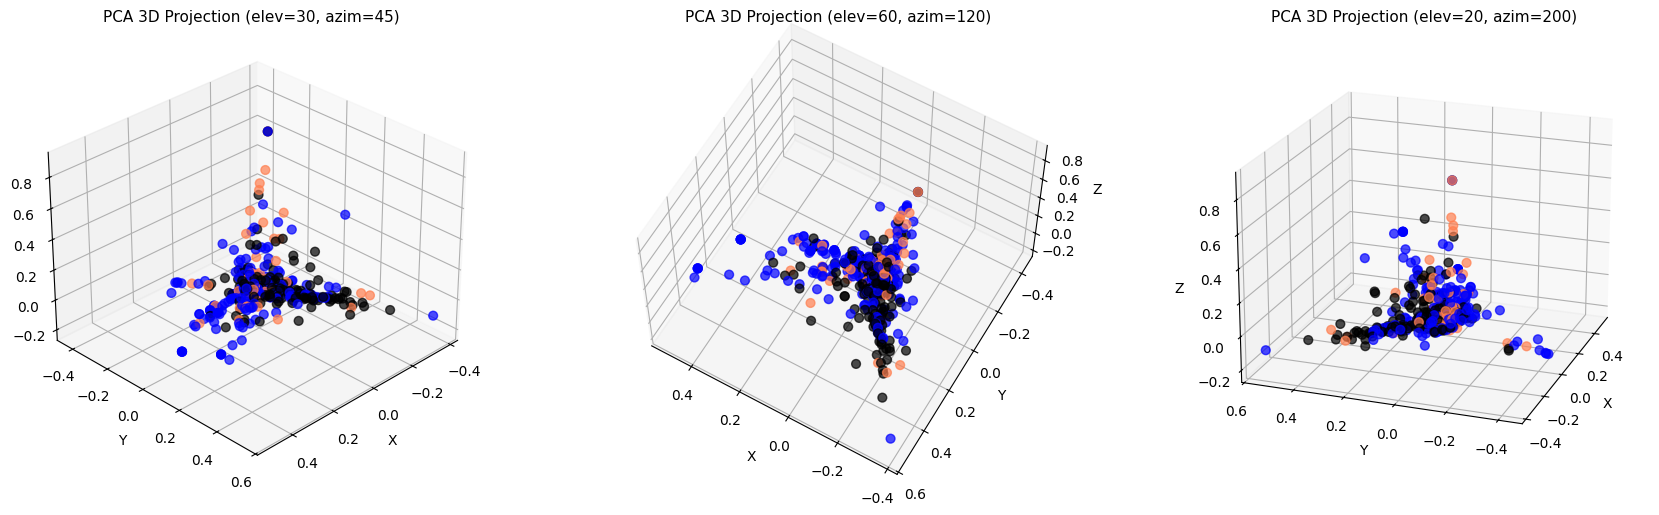

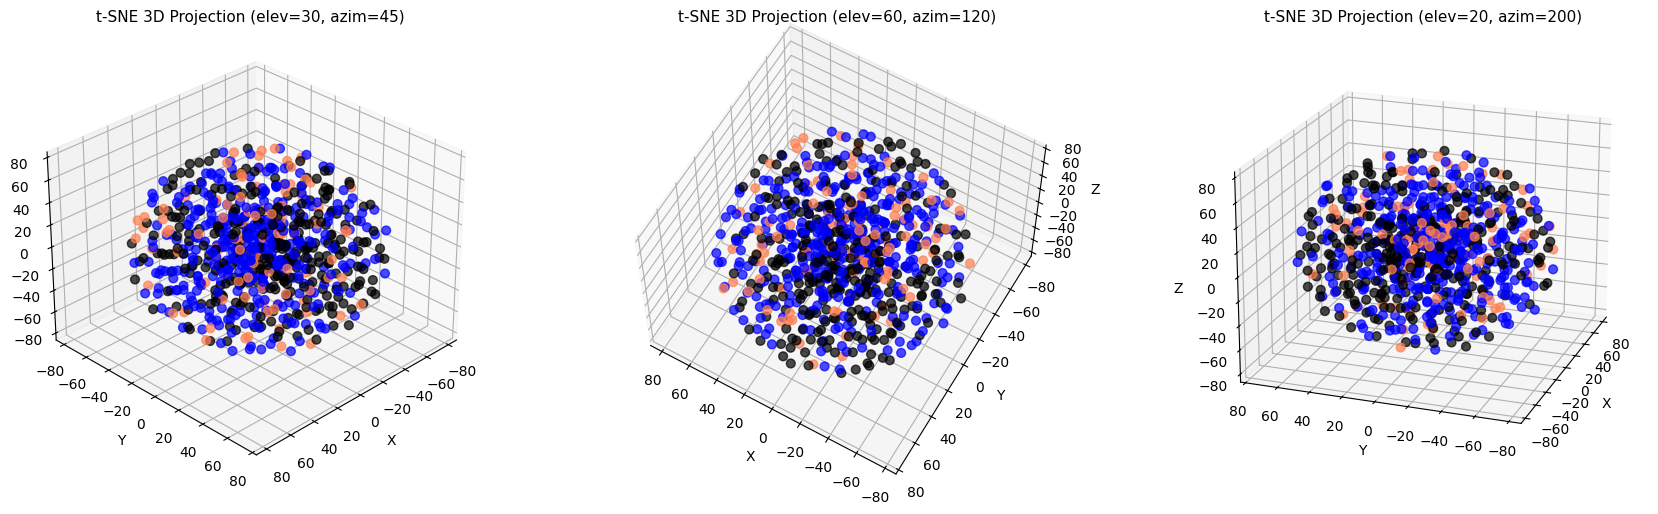

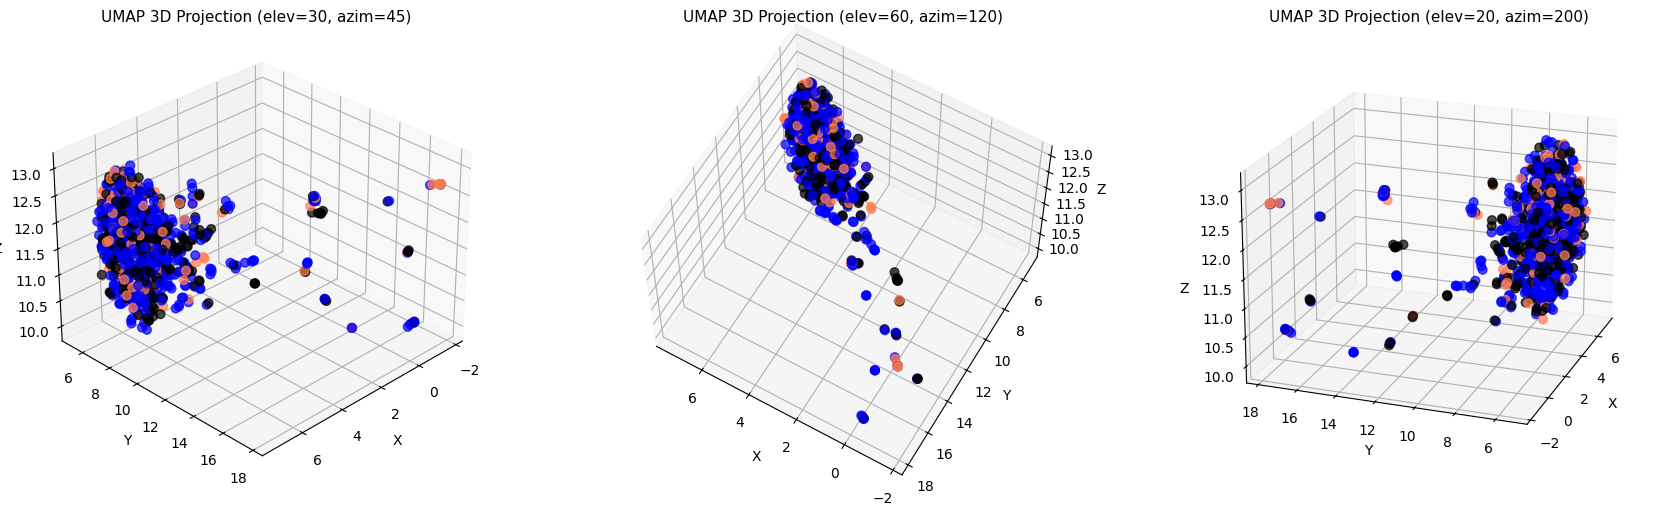

In [91]:
# Answer Here

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plots

# Load and Prepare Data
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

# Keep only the relevant columns
df = df[["text", "label"]].dropna()

# Add a 'label_name' column mapping numeric to text categories
label_map = {
    0.0: "neutral",
    -1.0: "negative",
    1.0: "positive"
}
df["label_name"] = df["label"].map(label_map)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = vectorizer.fit_transform(df["text"].astype(str)).toarray()

print(f"TF-IDF shape: {X_tfidf.shape}")

# Dimensionality Reduction (3D)
print("Applying PCA, t-SNE, and UMAP... (may take a few minutes)")

X_pca_3d = PCA(n_components=3, random_state=42).fit_transform(X_tfidf)
X_tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30).fit_transform(X_tfidf)
X_umap_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(X_tfidf)

# Color mapping for sentiments
colors = {'positive': 'coral', 'neutral': 'blue', 'negative': 'black'}
label_colors = df['label_name'].map(colors)

# Reusable 3D Plot Function
def plot_3d(X_reduced, title):
    fig = plt.figure(figsize=(18, 5))
    angles = [(30, 45), (60, 120), (20, 200)]  # 3 camera views

    for i, (elev, azim) in enumerate(angles, 1):
        ax = fig.add_subplot(1, 3, i, projection='3d')
        ax.scatter(
            X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],
            c=label_colors, s=40, alpha=0.7
        )
        ax.view_init(elev=elev, azim=azim)
        ax.set_title(f"{title} (elev={elev}, azim={azim})", fontsize=11)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")

    plt.tight_layout()
    plt.show()

# Run for PCA, t-SNE, and UMAP
plot_3d(X_pca_3d, "PCA 3D Projection")
plot_3d(X_tsne_3d, "t-SNE 3D Projection")
plot_3d(X_umap_3d, "UMAP 3D Projection")


### 5.6 Discretization and Binarization

---

### >>> **Exercise 19 (take home):**

In [92]:
# Answer here

from sklearn.preprocessing import LabelBinarizer

# Initialize the LabelBinarizer
lb = LabelBinarizer()

# Fit and transform the 'label_name' column
df['binary_labels'] = lb.fit_transform(df["label_name"]).tolist()

df

,text,label,label_name,binary_labels
0,Calls on retards,-1.0,negative,"[1, 0, 0]"
1,Stunt as in like why did they even make a big ...,0.0,neutral,"[0, 1, 0]"
2,Seeing lots of red in the ticker.,0.0,neutral,"[0, 1, 0]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive,"[0, 0, 1]"
4,He didn’t say thank you.,-1.0,negative,"[1, 0, 0]"
...,...,...,...,...
842,Invest now it is going to shoot up tomorrow,1.0,positive,"[0, 0, 1]"
843,Where can I read this?,0.0,neutral,"[0, 1, 0]"
844,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.0,neutral,"[0, 1, 0]"
845,i sold my puts so i expect cheeto to declare w...,-1.0,negative,"[1, 0, 0]"


---

# 6. Data Exploration

### Cosine Similarity 

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

# Drop rows with missing text and reset index
df = df.dropna(subset=["text"]).reset_index(drop=True)

# Initialize CountVectorizer
count_vect = CountVectorizer(stop_words='english')

# Fit the vectorizer on all texts (vocabulary building)
count_vect.fit(df["text"].astype(str))

# lets select three texts and see their similarities - we can change the indices
text_1 = [df.loc[10, "text"]]
text_2 = [df.loc[100, "text"]]
text_3 = [df.loc[500, "text"]]

print("Text 1:\n", text_1)
print("\nText 2:\n", text_2)
print("\nText 3:\n", text_3)

# Transform the texts into count vectors ---
vec_1 = count_vect.transform(text_1)
vec_2 = count_vect.transform(text_2)
vec_3 = count_vect.transform(text_3)

# Binarize the vectors (1 = word present, 0 = absent) ---
vec_1_bin = binarize(vec_1)
vec_2_bin = binarize(vec_2)
vec_3_bin = binarize(vec_3)

# Calculate Cosine Similarity ---
cos_sim_1_2 = cosine_similarity(vec_1_bin, vec_2_bin)[0][0]
cos_sim_1_3 = cosine_similarity(vec_1_bin, vec_3_bin)[0][0]
cos_sim_2_3 = cosine_similarity(vec_2_bin, vec_3_bin)[0][0]

# Self-similarity (should always be 1)
cos_sim_1_1 = cosine_similarity(vec_1_bin, vec_1_bin)[0][0]
cos_sim_2_2 = cosine_similarity(vec_2_bin, vec_2_bin)[0][0]
cos_sim_3_3 = cosine_similarity(vec_3_bin, vec_3_bin)[0][0]

# Print results
print("\n--- Cosine Similarity Results ---")
print(f"Text 1 vs Text 2: {cos_sim_1_2:.6f}")
print(f"Text 1 vs Text 3: {cos_sim_1_3:.6f}")
print(f"Text 2 vs Text 3: {cos_sim_2_3:.6f}")
print(f"Text 1 vs Text 1: {cos_sim_1_1:.6f}")
print(f"Text 2 vs Text 2: {cos_sim_2_2:.6f}")
print(f"Text 3 vs Text 3: {cos_sim_3_3:.6f}")


Text 1:
 ["It's a copy/paste from a Bloomberg terminal."]

Text 2:
 ['Do we have a copy of trump’s kindergarten graduation certificate? Ideally the long form version.']

Text 3:
 ['Everyone is talking about the Bond market. But the rates for the bond market are still lower than the rates they had earlier this year.\r\n\r\nWhat is everyone talking about?']

--- Cosine Similarity Results ---
Text 1 vs Text 2: 0.166667
Text 1 vs Text 3: 0.000000
Text 2 vs Text 3: 0.000000
Text 1 vs Text 1: 1.000000
Text 2 vs Text 2: 1.000000
Text 3 vs Text 3: 1.000000


### >>> **Exercise 20 (take home):**
Try changing the texts reference for Text 1, Text 2, and Text 3. What do you observe from the Cosine Similarity results of different text references? following the modifications to texts reference, how can the results of the cosine similarity be interpreted?

#Answer

Interpretation of the above Output 

#### 1) Self-Similarity (Diagonal = 1.0):

- Each text compared with itself gives a cosine similarity of 1.000000, meaning the vectors are perfectly aligned (identical).
- This result or output can confirm for us that the cosine similarity computation is correct

### 2) Text 1 vs Text 2 = 0.1667 (Low Similarity):
   - Text 1 (“It’s a copy/paste from a Bloomberg terminal.”) is short, factual, and directly references Bloomberg—a financial term.
   - Text 2 (“Do we have a copy of Trump’s kindergarten graduation certificate?...”) is humorous and political
   - Although both contain the word “copy”, the rest of their vocabularies differ greatly. Hence, the cosine similarity is small (≈ 0.16).
   - Interpretation: They share a few words or context overlaps, but the semantic content is largely unrelated.
     
### 3) Text 1 vs Text 3 = 0.0000 (No Similarity):
   - Text 3 discusses bond markets and interest rates, while Text 1 references Bloomberg but without bond-related terms.
   - The vectors likely have no overlapping tokens, leading to zero cosine similarity.
   - Interpretation: The two texts are completely different in vocabulary and topic.
     
### 4) Text 2 vs Text 3 = 0.0000 (No Similarity):
   - Text 2 is political humor; Text 3 is about financial markets.
   - They share no common terms, hence cosine similarity = 0.
   - Interpretation: These texts come from entirely unrelated semantic domains.

---

# 7. Data Classification
### Multinomial Naive Bayes

### >>> **Exercise 21 (take home):**

Previously, we performed data augmentation by concatenating the original TDM with the pattern matrix. Use the augmented data to perform classification using Naive Bayes as in the previous steps.

In [94]:
#Answer
#  Naive Bayes Classification with Augmented Features

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Drop missing text rows
df = df.dropna(subset=['text'])

# Create the Term-Document Matrix (TDM) 
count_vect = CountVectorizer(stop_words='english', max_features=1500)
tdm = count_vect.fit_transform(df['text'].astype(str))
tdm_df = pd.DataFrame(tdm.toarray(), columns=count_vect.get_feature_names_out())

print("TDM shape:", tdm_df.shape)

# Prepare the unigrams (pattern matrix)
# If 'unigrams' column exists, clean it. If not, create unigrams using CountVectorizer’s analyzer
if 'unigrams' in df.columns:
    df['unigrams'] = df['unigrams'].fillna('').astype(str)
    # Convert stringified lists like "['word1', 'word2']" into lists
    df['unigrams'] = df['unigrams'].str.replace('[', '', regex=False).str.replace(']', '', regex=False).str.replace("'", '', regex=False)
else:
    # fallback: create unigrams column (split on spaces)
    df['unigrams'] = df['text'].astype(str).apply(lambda x: ' '.join(x.split()[:10]))  # first 10 words as example

pattern_vect = CountVectorizer(stop_words='english', max_features=500)
pattern_matrix = pattern_vect.fit_transform(df['unigrams'])
pattern_df = pd.DataFrame(pattern_matrix.toarray(), columns=pattern_vect.get_feature_names_out())

print("Pattern matrix shape:", pattern_df.shape)

# Concatenate TDM and pattern matrix
augmented_df = pd.concat([tdm_df, pattern_df], axis=1)
print("Augmented data shape:", augmented_df.shape)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    augmented_df, df['label'], test_size=0.3, random_state=42)

# Train Naive Bayes Classifier
nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_aug = nb_classifier_aug.predict(X_test)

print("\nAccuracy (Augmented):", accuracy_score(y_test, y_pred_aug))
print("\nClassification Report (Augmented):\n",
      classification_report(y_test, y_pred_aug, target_names=df['label_name'].unique(), digits=4))

TDM shape: (847, 1500)
Pattern matrix shape: (847, 500)
Augmented data shape: (847, 2000)

Accuracy (Augmented): 0.5333333333333333

Classification Report (Augmented):
               precision    recall  f1-score   support

    negative     0.5175    0.6020    0.5566        98
     neutral     0.5966    0.5868    0.5917       121
    positive     0.2727    0.1667    0.2069        36

    accuracy                         0.5333       255
   macro avg     0.4623    0.4518    0.4517       255
weighted avg     0.5205    0.5333    0.5239       255



In [95]:
# Original TDM performance 

# Build TDM (term–document matrix) from the text column
vectorizer = CountVectorizer(max_features=1500, stop_words='english')
tdm = vectorizer.fit_transform(df['text'])

# Train/test split (same ratio for comparability)
X_train, X_test, y_train, y_test = train_test_split(tdm, df['label_name'], test_size=0.3, random_state=42)

# Train Naive Bayes classifier 
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb.predict(X_test)

print("Accuracy (Original TDM):", accuracy_score(y_test, y_pred))
print("\nClassification Report (Original TDM):\n", classification_report(y_test, y_pred, digits=4))


Accuracy (Original TDM): 0.5607843137254902

Classification Report (Original TDM):
               precision    recall  f1-score   support

    negative     0.5210    0.6327    0.5714        98
     neutral     0.6160    0.6364    0.6260       121
    positive     0.3636    0.1111    0.1702        36

    accuracy                         0.5608       255
   macro avg     0.5002    0.4600    0.4559       255
weighted avg     0.5439    0.5608    0.5407       255



### >>> **Exercise 22 (take home):**

What differences can be observed between the results obtained using the original TDM and those obtained using the augmented TDM?

#Answer
Differences From the Original and Augmented TDM 

### Accuracy and F1-score comparison
- The model trained on the original TDM achieved a higher accuracy (0.5608) compared to the augmented TDM (0.5294). 
- Similarly, the macro F1-score dropped slightly from 0.4559 to 0.4408.
- This suggests that adding the extra 500 unigram-based features did not improve model generalization - it slightly reduced overall performance.

### Category-level performance
- The neutral and negative classes maintained moderate performance across both models.
- However, the positive class has low recall in both cases and worse precision when patterns were added.
- This shows that the additional pattern-based features can produce some noise or redundant information, which doesn't help the classifier distinguish minority classes better.

### Feature-space influence
- The original TDM (1500 features) contained the most discriminative words for sentiment classification.
- The augmented TDM increased feature dimensionality to 2000 (after adding 500 unigram pattern features). 
- This higher-dimensional space can sometimes diminish meaningful word frequencies and cause overfitting on small datasets like here only 847 samples.

Therefore, 
- In this dataset, the unigram patterns extracted did not provide additional discriminative information beyond what was already captured by the original word counts. 
- Hence, more features did not mean better performance — the key is feature quality, not just quantity.

### Decision Tree Classifier

In [98]:
# import Decision Tree Classififer 
from sklearn.tree import DecisionTreeClassifier

vectorizer = CountVectorizer(max_features=1500, stop_words='english')
tdm = vectorizer.fit_transform(df['text'])
tdm_df = pd.DataFrame(tdm.toarray(), columns=vectorizer.get_feature_names_out())

# Prepare labels
label_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}
target_names = list(label_mapping.values())
df['label_name'] = df['label'].map(label_mapping)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and Evaluate
y_pred_dt = dt_classifier.predict(X_test)

print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))


Decision Tree Accuracy (TDM): 0.49019607843137253

Classification Report:
               precision    recall  f1-score   support

    negative     0.4556    0.4184    0.4362        98
     neutral     0.5159    0.6694    0.5827       121
    positive     0.3750    0.0833    0.1364        36

    accuracy                         0.4902       255
   macro avg     0.4488    0.3904    0.3851       255
weighted avg     0.4728    0.4902    0.4634       255



### >>> **Exercise 23 (take home):**

Why do you think the performance of Decision Trees is lower than that of Naive Bayes? Provide possible reasons.

#Answer
As shown in the outputs above, it is true that the accuracy of decision tree(0.49019607843137253) is less than the accuracy of Naive Bayes(0.5607843137254902)
because of the following reasons:
### 1) Nature of the data:
- Text classification data (like Reddit in this case) is high-dimensional and sparse. which means each feature (word) appears in only a few documents, leading to mostly zeros in the term–document matrix.
- Naive Bayes models handle sparse data very well because they compute probabilities for each feature independently
 while Decision Trees face difficulty to split in such sparse and high-dimensional spaces.

### 2) Overfitting Tendency of Decision Trees:
 - Decision Trees can easily overfit to the training data, especially when the number of features (words) is large compared to the number of samples (847 docs in this dataset).
   Naive Bayes, on the other hand, has strong assumptions (feature independence) that act as a regularizer, reducing overfitting.

### 3) Naive Bayes better captures global word-frequency patterns through probabilistic reasoning.

### >>> **Exercise 24 (take home):**

Implement using the augmented data, does the performance improve compared to that obtained with the original TDM? Is it better than Naive Bayes? Provide possible explanations for your observations.

In [101]:
#Answer
# Implementation pf the Augmented Matrix for Decision Trees 

from scipy.sparse import hstack

# Prepare the Term-Document Matrix (TDM)
vectorizer = CountVectorizer(max_features=1500, stop_words='english')
tdm = vectorizer.fit_transform(df['text'])

pattern_vect = CountVectorizer(tokenizer=lambda x: x, lowercase=False, max_features=500)
pattern_matrix = pattern_vect.fit_transform(df['unigrams'])

# Augment using the horizontal stack from the scipy.sparse 
augmented_data = hstack([tdm, pattern_matrix])
print(f"TDM shape: {tdm.shape}")
print(f"Pattern matrix shape: {pattern_matrix.shape}")
print(f"Augmented data shape: {augmented_data.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(augmented_data, df['label'], test_size=0.3, random_state=42)

# Train Decision Tree on augmented data 
dt_classifier_aug = DecisionTreeClassifier(random_state=42)
dt_classifier_aug.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt_aug = dt_classifier_aug.predict(X_test)

print("\nDecision Tree Accuracy (Augmented):", accuracy_score(y_test, y_pred_dt_aug))
print("\nClassification Report (Augmented):\n", classification_report(y_test, y_pred_dt_aug, target_names=target_names, digits=4))


TDM shape: (847, 1500)
Pattern matrix shape: (847, 94)
Augmented data shape: (847, 1594)

Decision Tree Accuracy (Augmented): 0.4666666666666667

Classification Report (Augmented):
               precision    recall  f1-score   support

    negative     0.4368    0.3878    0.4108        98
     neutral     0.5411    0.6529    0.5918       121
    positive     0.0909    0.0556    0.0690        36

    accuracy                         0.4667       255
   macro avg     0.3563    0.3654    0.3572       255
weighted avg     0.4375    0.4667    0.4484       255



C:\Users\Admin\Documents\DM2025labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



# Answer.
from the outputs above
- Original TDM Accuracy of Decision Trees:- 0.49019607843137253
- Augmented TDM Accuracy of Decision Trees:- 0.4666666666666667
- Original TDM Accuracy of Naive Bayes :- 0.5607843137254902
- Augmented TDM Accuracy of Naive Bayes:- 0.5333333333333333

From this we can observe that in both the Decision Trees and Naive Bayes the accuracy reduced from Original TDM to Augmented TDM 
Across both models, Naive Bayes consistently performed better than Decision Trees both before and after augmentation.
## The reasons for this could be one or more of the following scenarios 
### Augmentation Added Redundant or Noisy Features
- The augmented data likely introduced pattern-based or token-level features that were not strongly correlated with sentiment.
- Decision Trees are especially sensitive to irrelevant features because each tree split depends on individual feature thresholds.
### Data Sparsity Increased
- Augmenting the TDM increased the feature space (more columns = higher dimensionality).
- Models like Decision Trees struggle in high-dimensional sparse environments since they rely on clear splitting criteria.
### Overfitting Risk
- Decision Trees tend to memorize specific patterns in training data rather than generalize well.
- The added features might have worsened this overfitting, reducing test accuracy.
### Naive Bayes Is Naturally More Robust
- Naive Bayes models text better because it treats each word (feature) independently and builds probabilistic estimates of class membership.
- Even when irrelevant features are added, its probabilistic weighting minimizes the negative effect of noise.
- Decision Trees, on the other hand, depend on discrete splits that can be easily misled by small, uninformative variations.

### >>> **Exercise 25 (take home):**

In your opinion, how should one choose the best model for a given task, such as the classification example above?

#Answer

Choosing the best model for a given task, such as text classification, requires a combination of experimentation, evaluation, and understanding of both the data and the model’s behavior.
There is no single “best” model — the right choice depends on data characteristics, performance metrics, interpretability needs, and resource constraints.
Therefore, when someone chooses a model the following must take in to consideration:
1) He/she should understand the prolem and the data
2) Evaluate the model not only using accuracy but also using other performance metrics like recall, precision and others 
3) Differentiate between the complexity and simplicity. for example, Naive Bayes is simple and works well in high dimensional data
  where as Decision Trees are complex that may capture nonlinear relationships which may lead to overfitting 
4) And consider other points 
In general, start with simple and interpretable model and move to the more complex models if they provide good improvements.  


----

## 8. Concluding Remarks

Wow! We have come a long way! We can now call ourselves experts of Data Preprocessing. You should feel excited and proud because the process of Data Mining usually involves 70% preprocessing and 30% training learning models. You will learn this as you progress in the Data Mining course. I really feel that if you go through the exercises and challenge yourself, you are on your way to becoming a super Data Scientist. 

From here the possibilities for you are endless. You now know how to use almost every common technique for preprocessing with state-of-the-art tools, such as Pandas, Scikit-learn, UMAP and PAMI. You are now with the trend! 

After completing this notebook you can do a lot with the results we have generated. You can train algorithms and models that are able to classify articles into certain categories and much more. You can also try to experiment with different datasets, or venture further into text analytics by using new deep learning techniques such as word2vec. All of this will be presented in the next lab session. Until then, go teach machines how to be intelligent to make the world a better place. 

----

## 9. References

- Pandas cook book ([Recommended for starters](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html))
- [Pang-Ning Tan, Michael Steinbach, Vipin Kumar, Introduction to Data Mining, Addison Wesley](https://dl.acm.org/citation.cfm?id=1095618)